<a href="https://colab.research.google.com/github/GLO-CRYPTO/GLO-CRYPTO/blob/main/UNSDG11_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#import librries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Step 2: Set your file path (after uploading your Excel file to Colab)
file_path = '/content/SDG_11-2-1.xlsx'

# Step 3: Read the Excel file
df = pd.read_excel(file_path)

# Step 4: View the first few rows
df.head()


,SDG Goal,SDG Target,SDG Indicator,Country or Territory Code,Country or Territory Name,SDG Region,SDG Sub-Region,City Code,City Name,Share of urban population with convenient access to public transport (%),Data Units,Data Reference Year,Data Source,FootNote
0,11,11.2,11.2.1,4,Afghanistan,Central Asia and Southern Asia,Southern Asia,AF_CHARIKAR,Chārīkār,77.513852,PERCENT,2020,UN-Habitat Urban Indicators Database,Only public transport stops which are mapped a...
1,11,11.2,11.2.1,4,Afghanistan,Central Asia and Southern Asia,Southern Asia,AF_FARAH,Farāh,69.499376,PERCENT,2020,UN-Habitat Urban Indicators Database,Only public transport stops which are mapped a...
2,11,11.2,11.2.1,4,Afghanistan,Central Asia and Southern Asia,Southern Asia,AF_HERAT,Herat,50.358416,PERCENT,2020,UN-Habitat Urban Indicators Database,Only public transport stops which are mapped a...
3,11,11.2,11.2.1,4,Afghanistan,Central Asia and Southern Asia,Southern Asia,AF_JALALABAD,Jalālābād,44.183985,PERCENT,2020,UN-Habitat Urban Indicators Database,Only public transport stops which are mapped a...
4,11,11.2,11.2.1,4,Afghanistan,Central Asia and Southern Asia,Southern Asia,AF_KABUL,Kabul,19.062181,PERCENT,2020,UN-Habitat Urban Indicators Database,Only public transport stops which are mapped a...


In [4]:
# See all sheet names
import pandas as pd
sheet_names = pd.ExcelFile('/content/SDG_11-2-1.xlsx').sheet_names
sheet_names

['Sheet1']

In [10]:
# Display columns to confirm
print(df.columns)

# Keep only relevant columns
df = df[['Country or Territory Name',
         'SDG Region',
         'City Name',
         'Share of urban population with convenient access to public transport (%)',
         'Data Reference Year']]
         # Show total missing values per column
df.isnull().sum()


# Drop rows with missing target values
df = df.dropna(subset=['Share of urban population with convenient access to public transport (%)'])

# Encode text columns numerically
label_enc = LabelEncoder()
df['Country or Territory Name'] = label_enc.fit_transform(df['Country or Territory Name'])
df['SDG Region'] = label_enc.fit_transform(df['SDG Region'])
df['City Name'] = label_enc.fit_transform(df['City Name'])

# Define features and target
X = df[['Country or Territory Name', 'SDG Region', 'City Name', 'Data Reference Year']]
y = df['Share of urban population with convenient access to public transport (%)']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Data preprocessing complete.")
print("Training set size:", X_train.shape)

Index(['SDG Goal', 'SDG Target', 'SDG Indicator', 'Country or Territory Code',
       'Country or Territory Name', 'SDG Region', 'SDG Sub-Region',
       'City Code', 'City Name',
       'Share of urban population with convenient access to public transport (%)',
       'Data Units', 'Data Reference Year', 'Data Source', 'FootNote'],
      dtype='object')
✅ Data preprocessing complete.
Training set size: (1882, 4)


In [11]:
# Step 4: Train and evaluate a model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize model
model = RandomForestRegressor(
    n_estimators=100,    # number of trees
    random_state=42
)

# Train
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Evaluation:
Mean Absolute Error (MAE): 13.20
Root Mean Squared Error (RMSE): 19.32
R² Score: 0.58


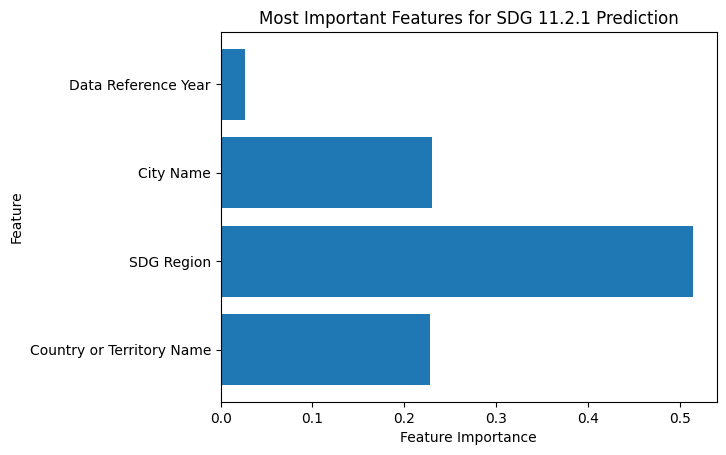

In [13]:
import matplotlib.pyplot as plt

# Feature importance
importance = model.feature_importances_
features = X.columns  # get feature names

plt.barh(features, importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Most Important Features for SDG 11.2.1 Prediction")
plt.show()
